# Analytical Benchmarks - 2D Cylindrical

In [1]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [2]:
#define the symbols used in the derivation
r,theta,rho,C1,Cr,Ctheta,gr,mu,rhor,rhotheta= symbols(r'r theta rho C1 C_r C_theta g_r mu rho_r rho_theta')
#rhor, rhotheta, tau_xx, tau_xy, tau_yx, tau_yy = symbols("rho_x rho_y tau_{xx} tau_{xy} tau_{yx} tau_{yy}")
tau_rr, tau_rtheta, tau_thetar, tau_thetatheta = symbols(r'tau_rr, tau_{rtheta}, tau_thetar, tau_thetatheta')
vr,vtheta= symbols('v_r v_theta',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):
TODO:clean these up such that momentum equations directly call tau functions, everything takes proper arguments, using global values for anything except mu seems dangerous

In [3]:
def get_continuity_equation_r(vr,rhor):
    return 1/(r*rhor)*Derivative(r*rhor*vr,r)

In [4]:
def get_continuity_equation_theta(vtheta,rhotheta):
    return 1/(r*rhotheta)*Derivative(rhotheta*vtheta,theta)

In [5]:
def get_velocity_divergence(vr,vtheta):
    return 1/r*Derivative(r*vr,r) + 1/r*Derivative(vtheta,theta)

In [6]:
def get_tau_rr():
    div = get_velocity_divergence(vr,vtheta)
    return -2*mu*Derivative(vr,r) + mu*div*Rational(2,3)

In [25]:
def get_tau_thetatheta():
    div = get_velocity_divergence(vr,vtheta)
    return -2*mu*(1/r*Derivative(r*vr,r) + vr/r) + mu*div*Rational(2,3)

In [8]:
def get_tau_rtheta():
    return -mu*(r*Derivative(vtheta/r,r) + 1/r*Derivative(vr,theta))

In [9]:
def get_tau_thetar():
    return get_tau_rtheta()

In [10]:
def get_momentum_equation_r(p):
    return -Derivative(p,r) + rho*gr - (1/r*Derivative(r*tau_rr,r) + 1/r*Derivative(tau_rtheta,theta) - tau_thetatheta/r)

In [31]:
def get_momentum_equation_theta(p):
    return -1/r*Derivative(p,theta) - (1/r*Derivative(r**2*tau_thetar,r) + 1/r*Derivative(tau_thetatheta,theta))

Next we prescibe the density profile, and then get the continuity equation, in both x and y directions:

In [12]:
rhor=r
rhotheta=cos(theta)
rho=rhor*rhotheta

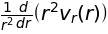

In [13]:
continuity_equation_r = get_continuity_equation_r(vr(r),rhor)
continuity_equation_r

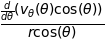

In [14]:
continuity_equation_theta = get_continuity_equation_theta(vtheta(theta),rhotheta)
continuity_equation_theta

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equations for the velocity:

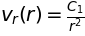

In [15]:
velocity_equation_r = dsolve(continuity_equation_r)
velocity_equation_r

In [16]:
rhotheta

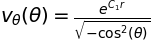

In [17]:
velocity_equation_theta = dsolve(continuity_equation_theta)
velocity_equation_theta

Due to limitations with sympy, it finds an imaginary solution, whereas we need the real part. We therefore prescribe a real solution, then verify it:

In [18]:
vtheta = Ctheta/cos(theta)

In [19]:
get_continuity_equation_theta(vtheta,rhotheta).doit()

In [20]:
vr = velocity_equation_r.rhs.subs(C1,Cr)
vr

Next, we obtain the stress tensor $\tau$:

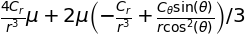

In [21]:
tau_rr = get_tau_rr()
tau_rr.doit()

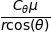

In [22]:
tau_rtheta = get_tau_rtheta()
tau_rtheta.doit()

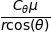

In [23]:
tau_thetar = get_tau_thetar()
tau_thetar.doit()

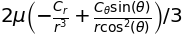

In [26]:
tau_thetatheta = get_tau_thetatheta()
tau_thetatheta.doit()

Now, we prescibe the gravitational field:

Then, we obtain the momentum equation:

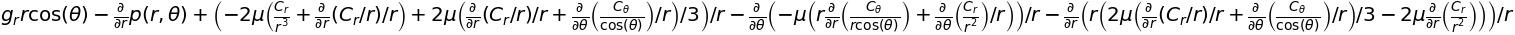

In [27]:
momentum_equation_r = get_momentum_equation_r(p(r,theta))
momentum_equation_r

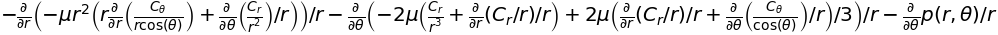

In [32]:
momentum_equation_theta = get_momentum_equation_theta(p(r,theta))
momentum_equation_theta

Next, we solve this differential equation (by integrating with respect to x) to give us an equation for the pressure:

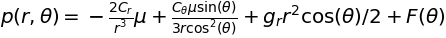

In [33]:
pressure_equation = pdsolve(momentum_equation_r)
pressure_equation

This equation features the unknown function F(y).
To find this function, we first differentiate both sides with respect to y:

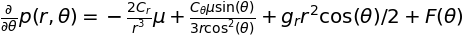

In [34]:
pressure_equation_derivative = Derivative(pressure_equation,theta)
pressure_equation_derivative

We then substitute this equation for dp/dy into the y-dimension momentum equation:

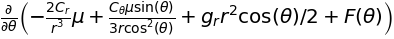

In [35]:
Derivative(pressure_equation.rhs,theta)

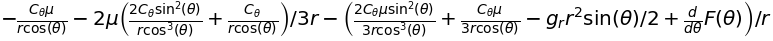

In [36]:
F_equation = momentum_equation_theta.subs(Derivative(pressure_equation.lhs,theta),
                         Derivative(pressure_equation.rhs,theta)).doit()
F_equation

We then solve this equation for F, by integrating with respect to y:

In [37]:
F_solved = dsolve(F_equation)
F_solved

KeyboardInterrupt: 

We then substitute this equation for y into the previous pressure equation, thus giving us a final equation for the pressure:

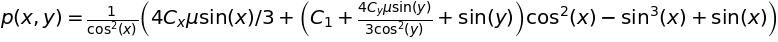

In [32]:
pressure_equation_final = pressure_equation.subs(F_solved.lhs,F_solved.rhs)
pressure_equation_final

We now have to perform a trigonometric substitution to neaten the solution, which Sympy itself cannot find

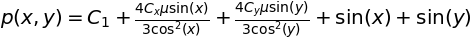

In [33]:
pressure_equation_final = pressure_equation_final.subs(-sin(x)**3+sin(x),sin(x)*cos(x)**2).expand()
pressure_equation_final

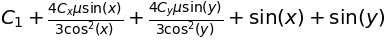

In [34]:
p = pressure_equation_final.rhs
p

We then perform two "sanity checks": we substitute the obtained equations into the continuity and momentum equations, which should then return zero:

In [35]:
get_momentum_equation_x(p).doit().expand()

In [36]:
get_momentum_equation_y(p).doit().expand()

In [37]:
get_continuity_equation_x(vx,rho).doit()

In [38]:
get_continuity_equation_y(vy,rho).doit()

Finally, we need to calculate the strain rate:

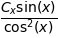

In [39]:
exx = Derivative(vx,x).doit()
exx

In [40]:
exy = Derivative(vx,y).doit()
exy

In [41]:
eyx = Derivative(vy,x).doit()
eyx

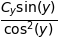

In [42]:
eyy = Derivative(vy,y).doit()
eyy

This gives us the following final equations for the velocity and pressure:

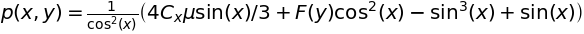

In [43]:
pressure_equation

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In [44]:
density_function = lambdify((x,y),rho)

In [45]:
vx_function = lambdify((x,y),vx.subs(Cx,1))

In [46]:
vy_function = lambdify((x,y),vy.subs(Cy,1))

In [47]:
def v_magnitude_function(x,y):
    return np.sqrt(vy_function(x,y)**2 + vx_function(x,y)**2)

In [48]:
pressure_function = lambdify((x,y),p.subs(C1,0).subs(Cx,1).subs(mu,1).subs(Cy,1))

In [49]:
exx_function = lambdify((x,y),exx.subs(Cx,1))

In [50]:
eyy_function = lambdify((x,y),eyy.subs(Cy,1))

Now we need an x range to plot over:


In [51]:
x_plotting = np.arange(-1.3,1.3,0.01)
y_plotting = np.arange(-1.3,1.3,0.01)
X_plotting,Y_plotting = np.meshgrid(x_plotting,y_plotting)

Finally, we plot the density, velocity and pressure profiles:

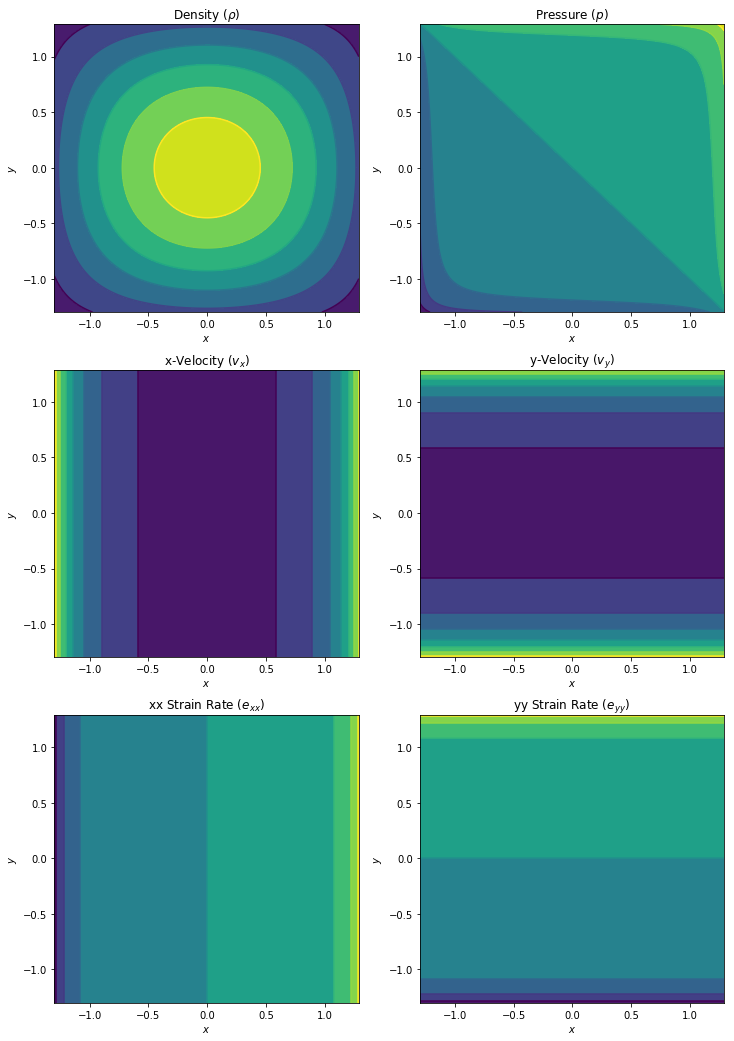

In [52]:
fig,axes = plt.subplots(3,2,figsize=(12,18))

axes[0,0].contourf(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].contour(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].set_xlabel("$x$")
axes[0,0].set_ylabel("$y$")
axes[0,0].set_title(r"Density ($\rho$)")

axes[0,1].contourf(X_plotting,Y_plotting,pressure_function(X_plotting,Y_plotting))
axes[0,1].contour(X_plotting,Y_plotting,pressure_function(X_plotting,Y_plotting))
axes[0,1].set_xlabel("$x$")
axes[0,1].set_ylabel("$y$")
axes[0,1].set_title(r"Pressure ($p$)")

axes[1,0].contourf(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].contour(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].set_xlabel("$x$")
axes[1,0].set_ylabel("$y$")
axes[1,0].set_title(r"x-Velocity ($v_x$)")

axes[1,1].contourf(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].contour(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].set_xlabel("$x$")
axes[1,1].set_ylabel("$y$")
axes[1,1].set_title(r"y-Velocity ($v_y$)")

axes[2,0].contourf(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].contour(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].set_xlabel("$x$")
axes[2,0].set_ylabel("$y$")
axes[2,0].set_title(r"xx Strain Rate ($e_{xx}$)")

axes[2,1].contourf(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].contour(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].set_xlabel("$x$")
axes[2,1].set_ylabel("$y$")
axes[2,1].set_title(r"yy Strain Rate ($e_{yy}$)")

In [53]:
fig.savefig("2DCartesianSinusoidal.pdf")